### ABOUT

This NB is intended to compare the S1 and S1 variables between two different runs. Just events with one S1 are analyzed.

### RUNS  INFORMATION
<table style="width:100%, text-align:left">
    <tr>
        <th> Run Info </th>
        <th> Run 1: 6484 </th>
        <th> Run 2: 6803 </th>
    </tr>
    <tr>
        <th>  DATE </th>
        <td> Start date: 19-11-2018 15:12:18 <br>
             End   date: 20-11-2018 15:37:38 <br>
             Duration (sec): 87920 
        </td>
        <td> Start date: 18-01-2019 12:59:16  <br>
             End   date: 20-01-2019 17:35:35  <br>
             Duration (sec): 189379
        </td>
    </tr>
    <tr>
        <th> RUN TYPE  </th>
        <td> 21 - Kr + Th at lateral port (and Cs) </td> 
        <td> 21 - Kr + Th at lateral port (and Cs) </td>  
    </tr>
    <tr>
        <th> TRIGGERS (Type 2) </th>
        <td> OK: 681687 <br>
             LOST: 112746
        </td>
        <td> OK: 552780 <br>
             LOST: 667395 
        </td>
    </tr>
    <tr>
        <th> DETECTOR CONDITIONS </th>
        <td> Presure (bar):10.29 <br>
             Temperature (ºC):22.73	<br>
             Cathode Voltage (volts):29999.90 <br>
             Gate Voltage (volts):7900.06 <br>
        </td>
        <td> Presure (bar): 10.14  <br>
             Temperature (ºC): 21.05	<br>
             Cathode Voltage (volts):30000.70 <br>
             Gate Voltage (volts): 7499.80 <br>
        </td>
    </tr>
</table>

**Comments**: DAQ buffer, PMT pedestal and gains has changed between these runs. Sources positions were interchanged in between these runs.

In [1]:
import os

import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Plotting style
default_cmap = "viridis"
figure_size  = 15, 5
font_size    = 14

plt.rcParams["figure.figsize"]  = figure_size
plt.rcParams[  "font.size"   ]  = font_size
plt.rcParams[  "image.cmap"  ]  = default_cmap
plt.rcParams["axes.facecolor"]  = 'ghostwhite'
#plt.rcParams["axes.grid"     ]  = True
plt.rcParams["grid.color"    ]  = 'lightgrey'
plt.rcParams["axes.formatter.limits"] = -4, 4
plt.rcParams["font.family"]='serif'

#plt.style.use(plt.style.available[10])

In [3]:
trigger = 2
run1 = 6484
run2 = 6803

In [4]:
run1_S1    = pd.read_hdf(f'SPeaks_info_run{run1}_trigger{trigger}.h5', key='S1')
run1_S2    = pd.read_hdf(f'SPeaks_info_run{run1}_trigger{trigger}.h5', key='S2')
run1_Rates = pd.read_hdf(f'SPeaks_info_run{run1}_trigger{trigger}.h5', key='Rates')


run2_S1    = pd.read_hdf(f'SPeaks_info_run{run2}_trigger{trigger}.h5', key='S1')
run2_S2    = pd.read_hdf(f'SPeaks_info_run{run2}_trigger{trigger}.h5', key='S2')
run2_Rates = pd.read_hdf(f'SPeaks_info_run{run2}_trigger{trigger}.h5', key='Rates')

In [5]:
def histo_1d(values_run1, values_run2=None, xlabel=None ,rg= None, nbins=100, scale=None):
    '''
    Arguments:
    
    values = values to be histogramed
    xlabel = str with label to x axis
    rg  = range of the histogram
    nbins = number of bins of the histogram
    scale = scale of the y axis
    
    '''
    values_run1 = np.array(values_run1)
    
    if rg is None: 
        rg =(values_run1.min(), values_run1.max())
        
        if values_run2 is not None:
            mins=np.array([values_run1.min(), values_run2.min()])
            maxs=np.array([values_run1.max(), values_run2.max()])
            rg = (mins.min(), maxs.max())
    
    H1, edg = np.histogram(values_run1, range=rg, bins=nbins)
    x = [(edg[i+1]+edg[i])/2. for i in range(0, len(edg)-1)]
    N1 = len(values_run1)
    
    
    fig = plt.figure()
    ax = fig.add_subplot(121)
    
    ax.step(x, H1/N1, where='mid', label=f'{run1}', c='blue')
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel('')
    
    if values_run2 is not None:
        values_run2 = np.array(values_run2)
        H2, _   = np.histogram(values_run2, range=rg, bins=nbins)
        N2 = len(values_run2)
        
        ax.step(x, H2/N2, where='mid', label=f'{run2}', c='red')
        
        ax2 = fig.add_subplot(122)
        ax2.scatter(x, H1/N1*N2/H2)
        
        ax2.set_xlabel(xlabel)
        ax2.set_ylabel('Run1/Run2')
        
    ax.legend()
    if scale is not None: ax.set_yscale(scale)
        

def one_S1_selector(run_S1):
    events, n_S1s = np.unique(run_S1['S1_event_number'].values, return_counts=True)
    idx = np.argwhere(n_S1s==1).flatten()
    events_1S1 = events[idx]
    
    events = run_S1.S1_event_number.values
    run_S1_1S1 = run_S1[np.in1d(events, events_1S1)]
    
    return run_S1_1S1

In [6]:
run1_S1_1S1 = one_S1_selector(run1_S1)
run1_S2_1S1 = run1_S2[np.in1d(run1_S2.S2_event_number.values, run1_S1_1S1.S1_event_number)]

run2_S1_1S1 = one_S1_selector(run2_S1)
run2_S2_1S1 = run2_S2[np.in1d(run2_S2.S2_event_number.values, run2_S1_1S1.S1_event_number)]

# Rates (in number of events, not in number of signals)

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide
/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


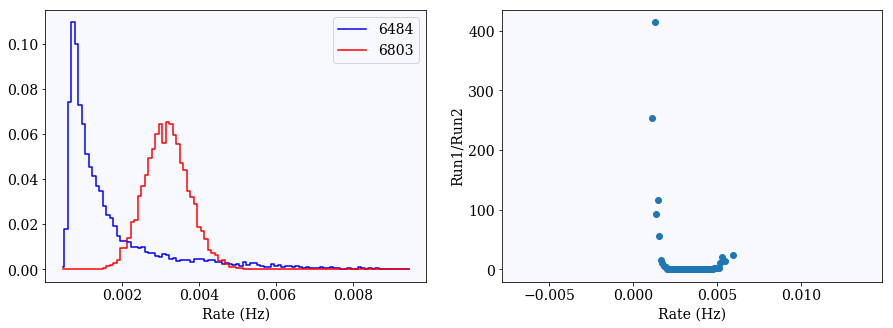

In [7]:
histo_1d(run1_Rates['Rate'].values,
         run2_Rates['Rate'].values,
         rg=None,
         xlabel='Rate (Hz)')

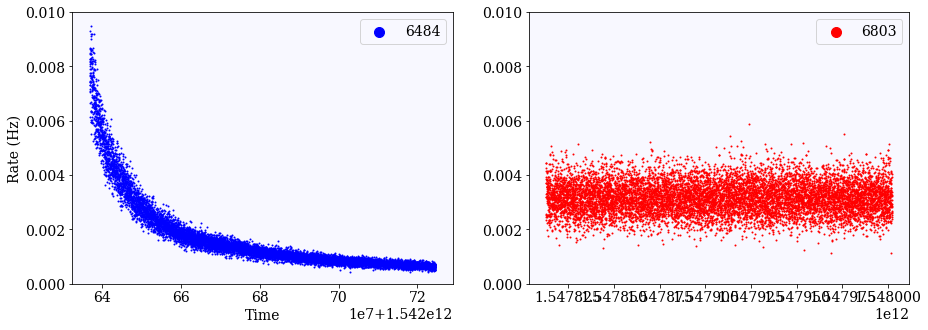

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.scatter(run1_Rates.Time, run1_Rates.Rate, s=1, color='blue', label=f'{run1}')
ax2.scatter(run2_Rates.Time, run2_Rates.Rate, s=1, color='red' , label=f'{run2}')

ax1.set_xlabel('Time')
ax1.set_ylabel('Rate (Hz)')

ax1.set_ylim([0, 0.01])
ax2.set_ylim([0, 0.01])

ax1.legend(markerscale=10)
ax2.legend(markerscale=10);

# S1 distributions

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


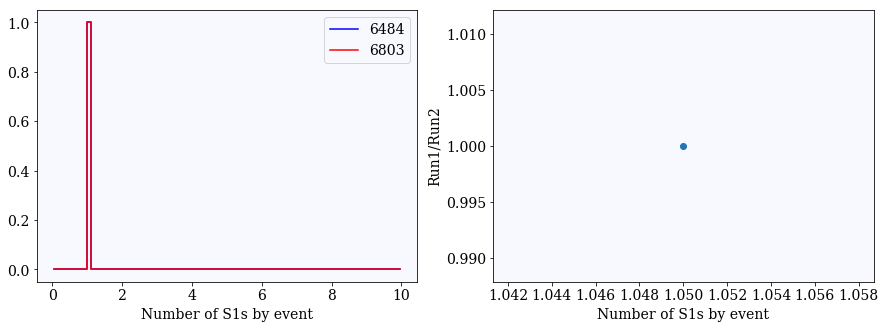

In [9]:
histo_1d(np.unique(run1_S1_1S1['S1_event_number'].values, return_counts=True)[1],
         np.unique(run2_S1_1S1['S1_event_number'].values, return_counts=True)[1],
         rg=(0, 10),
         xlabel='Number of S1s by event')

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


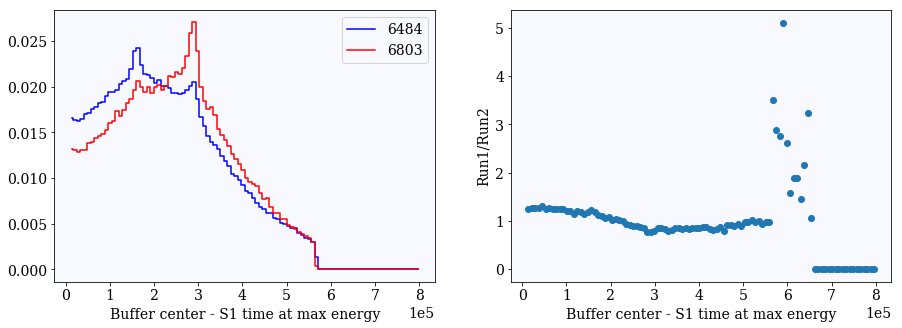

In [10]:
histo_1d(650e3 - run1_S1_1S1['S1_time'].values,
         800e3 - run2_S1_1S1['S1_time'].values,
         xlabel='Buffer center - S1 time at max energy')

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide
/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


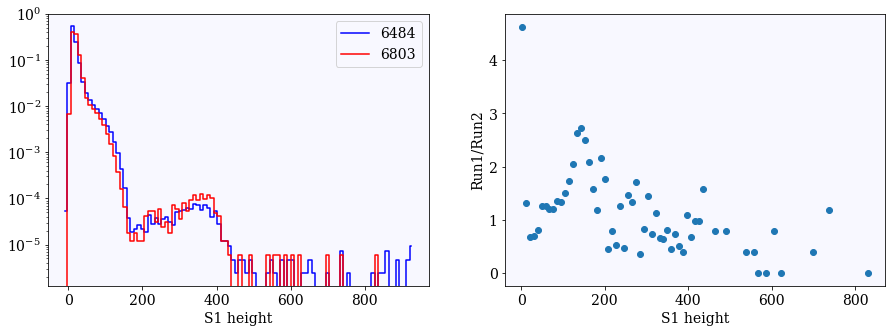

In [11]:
histo_1d(run1_S1_1S1['S1_height'].values, 
         run2_S1_1S1['S1_height'].values, 
         xlabel='S1 height', 
         scale='log')

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide
/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


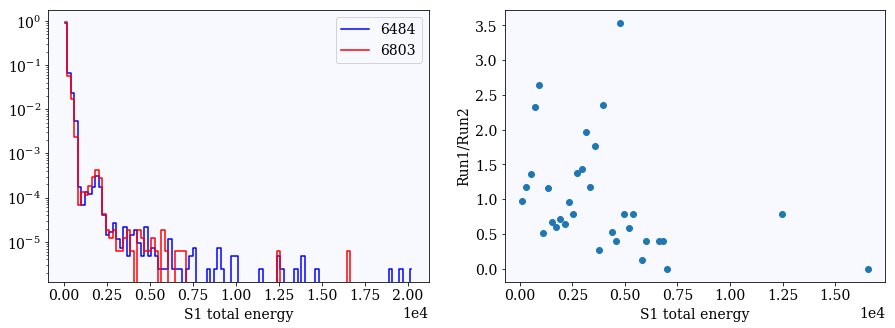

In [12]:
histo_1d(run1_S1_1S1['S1_energy'].values, 
         run2_S1_1S1['S1_energy'].values, 
         xlabel='S1 total energy', 
         scale='log')

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


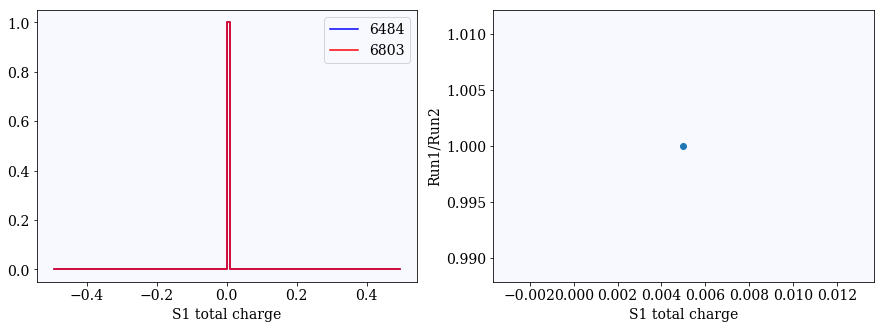

In [13]:
histo_1d(run1_S1_1S1['S1_charge'].values,
         run2_S1_1S1['S1_charge'].values, 
         xlabel='S1 total charge')

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide
/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


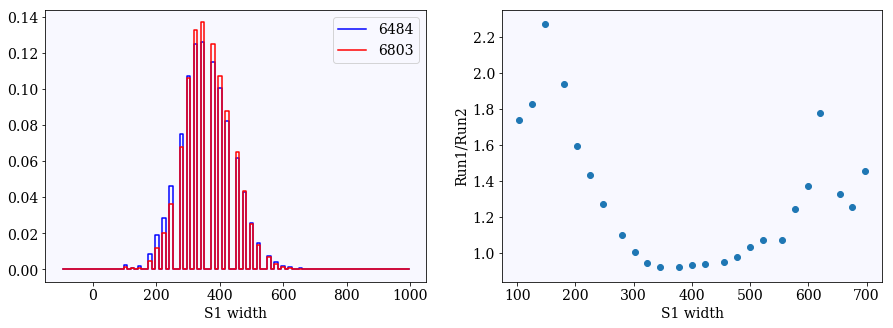

In [14]:
histo_1d(run1_S1_1S1['S1_width'].values, 
         run2_S1_1S1['S1_width'].values, 
         xlabel='S1 width', 
         rg = (-100, 1e3))

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide
/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


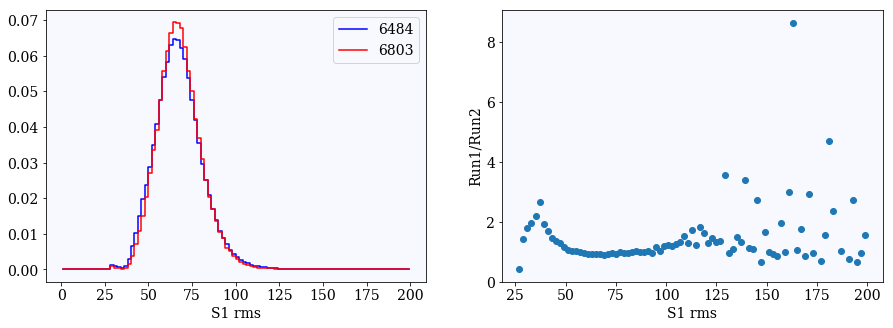

In [15]:
histo_1d(run1_S1_1S1['S1_rms'].values, 
         run2_S1_1S1['S1_rms'].values,
         xlabel='S1 rms',
         rg=(0, 200))

# S2 distributions

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide
/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


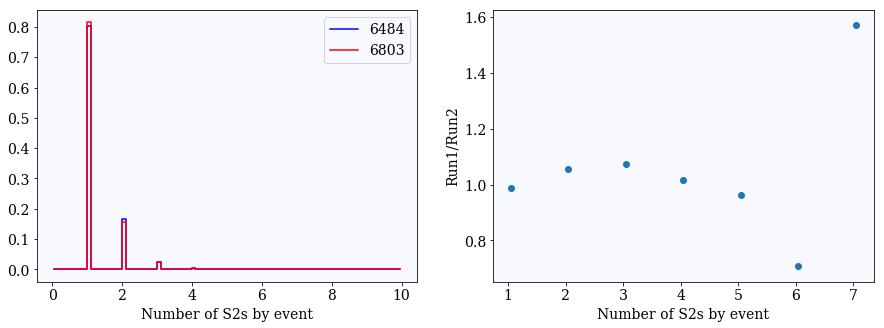

In [16]:
histo_1d(np.unique(run1_S2_1S1['S2_event_number'].values, return_counts=True)[1],
         np.unique(run2_S2_1S1['S2_event_number'].values, return_counts=True)[1],
         rg=(0, 10),
         xlabel='Number of S2s by event')

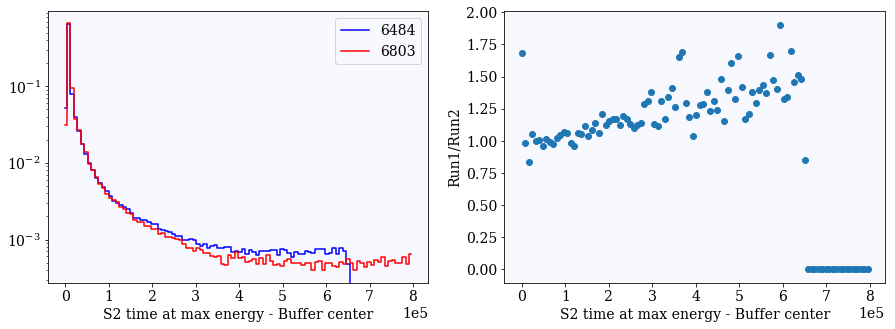

In [17]:
histo_1d(run1_S2_1S1['S2_time'].values - 650e3,
         run2_S2_1S1['S2_time'].values - 800e3,
         xlabel='S2 time at max energy - Buffer center',
         scale='log')

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


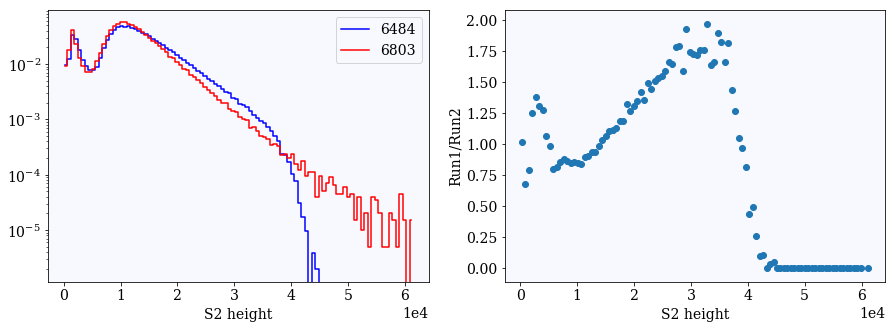

In [18]:
histo_1d(run1_S2_1S1['S2_height'].values, 
         run2_S2_1S1['S2_height'].values, 
         xlabel='S2 height', 
         scale='log')

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide
/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


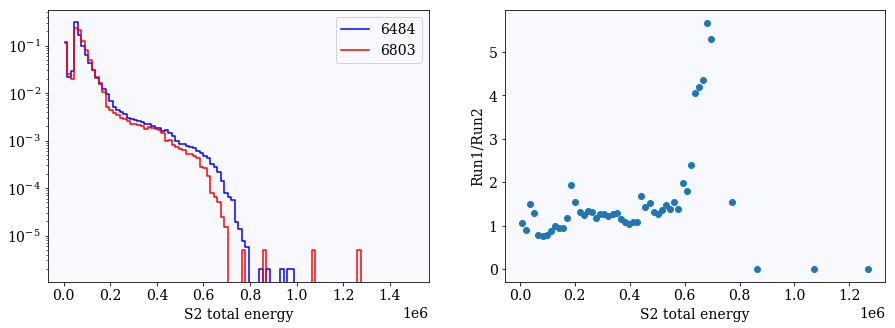

In [19]:
histo_1d(run1_S2_1S1['S2_energy'].values, 
         run2_S2_1S1['S2_energy'].values, 
         xlabel='S2 total energy', 
         scale='log',
         rg=(0, 1.5e6))

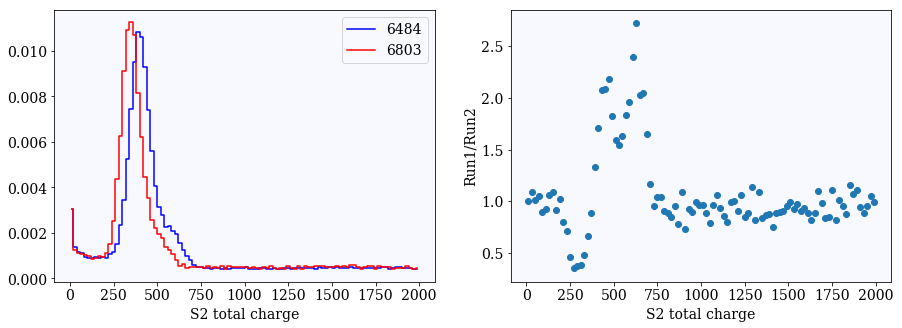

In [20]:
histo_1d(run1_S2_1S1['S2_charge'].values, 
         run2_S2_1S1['S2_charge'].values, 
         xlabel='S2 total charge', 
         rg = (0, 2e3))

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide


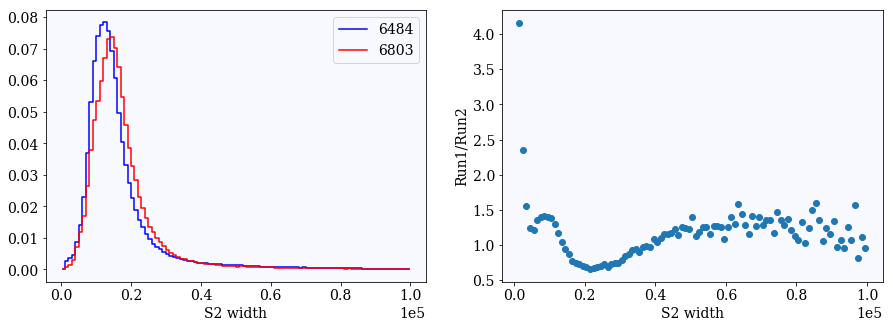

In [21]:
histo_1d(run1_S2_1S1['S2_width'].values, 
         run2_S2_1S1['S2_width'].values, 
         xlabel='S2 width', 
         rg = (0, 1e5))

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide


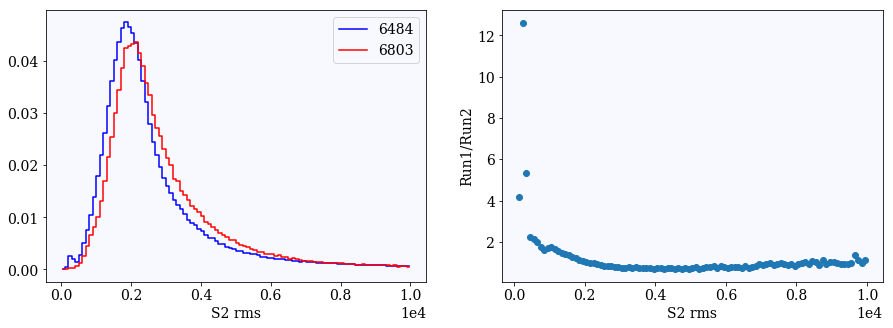

In [22]:
histo_1d(run1_S2_1S1['S2_rms'].values, 
         run2_S2_1S1['S2_rms'].values,
         xlabel='S2 rms',
         rg=(0, 1e4))